<a href="https://colab.research.google.com/github/gauravkv95/HalloweenCandiesWinPrediction/blob/master/HalloweenCandiesWinPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ML1 Project

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Modelling using Linear Regression Algorithm](#section4)<br>
    - 4.1 [Preparing X and y dataset](#section401)<br>
        - 4.1.1 [Splitting X and y into training and test datasets](#section40101)<br>
        - 4.1.2 [Scaling of training and test datasets](#section40102)<br>
    - 4.2 [Model Formation and Prediction using Linear Regression Algorithm](#section402)<br>
        - 4.2.2 [Interpreting Model Coefficients](#section40202)<br>
    - 4.3 [Model Formation and Prediction using Decision Tree Regressor Algorithm](#section403)<br>
    - 4.4 [Model Formation and Prediction using Random Forest Regressor Algorithm](#section404)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value](#section502)<br>

<a id=section1></a> 
### 1. Problem Statement

Each row in the dataset corresponds to one type of Halloween candy.
Participants are shown different candies two at time and were asked which candy do they prefer.
After aggregating all the votes, each candy is given winpercent.
Based on the given dataset we have to predict the winpercent of candies that are unknown to current dataset.

<a id=section2></a> 
### 2. Data Loading and Description

The dataset has below features based on which the winpercent of candies will be predicted.
- chocolate: Does it contain chocolate?
- fruity: Is it fruit flavored?
- caramel: Is there caramel in the candy?
- peanutalmondy: Does it contain peanuts, peanut butter or almonds?
- nougat: Does it contain nougat?
- crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
- hard: Is it a hard candy?
- bar: Is it a candy bar?
- pluribus: Is it one of many candies in a bag or box?
- sugarpercent: The percentile of sugar it falls under within the data set.
- pricepercent: The unit price percentile compared to the rest of the set.
- winpercent: The overall win percentage according to 269,000 matchups.

### Importing Packages

In [ ]:
import pandas as pd #helps in transforming or modeifying df
import seaborn as sns #visualization
import matplotlib.pyplot as plt


from sklearn import metrics # RMSE and R2

import numpy as np #numerical cal in python, log transformation, sqroot..

# allow plots to appear directly in the notebook
%matplotlib inline

### Importing the Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv', index_col= 0)
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<a id=section3></a> 
### 3. Exploratory Data Analysis

In [ ]:
data.shape

(85, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(80)
#print(missing_data)

,Total,Percent
winpercent,0,0.0
pricepercent,0,0.0
sugarpercent,0,0.0
pluribus,0,0.0
bar,0,0.0
hard,0,0.0
crispedricewafer,0,0.0
nougat,0,0.0
peanutyalmondy,0,0.0
caramel,0,0.0


In [ ]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


__Observations__

- There are 85 observations and 12 features.
- There is no null value in dataset.
- Most of the features are having binary observations.
- Win Percent data is Right skewed.

#### Plotting of Observations:

Text(0.5, 1, 'Correlation between features')

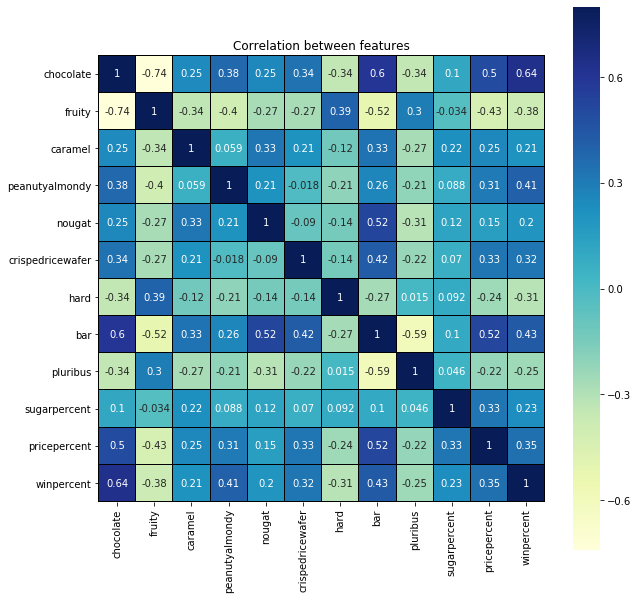

In [ ]:
corr = data.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,vmax=0.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
ax.set_ylim(12, 0)
plt.title('Correlation between features')

__Observations__

- None of the features are highly correlated to each other.
- Chocolate is maximum positively correlated to winpercentage.
- Fruity is maximum negatively correlated to winpercentage.

<a id=section4></a>
### 4. Modelling using Linear Regression Algorithm

<a id=section401></a>
### 4.1 Preparing X and y dataset

In [ ]:
feature_cols = data.columns.drop('winpercent')                # create a Python list of feature names
X = data[feature_cols] 
y = data.winpercent

<a id=section40101></a>
### 4.1.1 Splitting X and y into training and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

<a id=section40102></a>
### 4.1.2 Scaling of training and test datasets

In [ ]:
from sklearn.preprocessing import MinMaxScaler #import the class

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data = X_train, columns = feature_cols)
X_test = pd.DataFrame(data = X_test, columns = feature_cols)

<a id=section402></a>
### 4.2 Model formation and Prediction using Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit(X_train, y_train) #calculation of b0 and b1

y_pred_test_LR = linreg.predict(X_test) 
y_pred_train_LR = linreg.predict(X_train)

<a id=section40202></a>
### 4.2.2 Interpreting Model Coefficients after application of Linear Regression Algorithm

In [ ]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_) #list creation

In [ ]:
eq1 = zip(feature_cols, coef)
print ("Coefficients of each features derived from Linear Regression Algorithm")
print ("----------------------------------------------------------------------")
for c1,c2 in eq1:
    print(c1,c2)

Coefficients of each features derived from Linear Regression Algorithm
----------------------------------------------------------------------
chocolate 35.182031935297545
fruity 17.04879173814442
caramel 7.05980136366004
peanutyalmondy 2.65092900615174
nougat 14.531483029659368
crispedricewafer -2.372995847920603
hard 11.140649718446145
bar -6.801578080331075
pluribus 3.174547576792408
sugarpercent -0.3917696044911311
pricepercent 10.357975515293562


<a id=section403></a>
### 4.3 Model formation and Prediction using Decision Tree Regressor Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

DTreg = DecisionTreeRegressor()
DTreg.fit(X_train, y_train)

y_pred_test_DT = DTreg.predict(X_test) 
y_pred_train_DT = DTreg.predict(X_train)

<a id=section404></a>
### 4.4 Model formation and Prediction using Random Forest Regressor Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

RFreg = RandomForestRegressor()
RFreg.fit(X_train, y_train)

y_pred_test_RF = RFreg.predict(X_test) 
y_pred_train_RF = RFreg.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<a id=section5></a>
### 5. Model Evaluation

<a id=section501></a>
### 5.1 Model evaluation using metrics

In [ ]:
# Calculation of RMSE
RMSE_test_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_LR))  
RMSE_train_LR = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_LR)) 

RMSE_test_DT = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_DT))  
RMSE_train_DT = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_DT)) 

RMSE_test_RF = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_RF))  
RMSE_train_RF = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_RF)) 

print ("Root Mean Square Error of test dataset for Linear Regression Algorithm is ", RMSE_test_LR)
print ("Root Mean Square Error of train dataset for Linear Regression Algorithm is ", RMSE_train_LR)
print ("---------------------------------------------------------------------------------------------------")
print ("Root Mean Square Error of test dataset for Decision Tree Regressor Algorithm is ", RMSE_test_DT)
print ("Root Mean Square Error of train dataset for Decision Tree Regressor Algorithm is ", RMSE_train_DT)
print ("---------------------------------------------------------------------------------------------------")
print ("Root Mean Square Error of test dataset for Random Forest Regressor Algorithm is ", RMSE_test_RF)
print ("Root Mean Square Error of train dataset for Random Forest Regressor Algorithm is ", RMSE_train_RF)

Root Mean Square Error of test dataset for Linear Regression Algorithm is  13.533966259353257
Root Mean Square Error of train dataset for Linear Regression Algorithm is  9.176235464056967
---------------------------------------------------------------------------------------------------
Root Mean Square Error of test dataset for Decision Tree Regressor Algorithm is  13.822148981672571
Root Mean Square Error of train dataset for Decision Tree Regressor Algorithm is  2.932787310288853
---------------------------------------------------------------------------------------------------
Root Mean Square Error of test dataset for Random Forest Regressor Algorithm is  13.359548772647335
Root Mean Square Error of train dataset for Random Forest Regressor Algorithm is  5.775307711868402


<a id=section502></a>
### 5.2 Model Evaluation using R-Squared and Adjusted R-Squared Value

In [ ]:
# Calculation of R-Squared value
from sklearn.metrics import r2_score

R2_train_LR= r2_score(y_train, y_pred_train_LR)
R2_test_LR= r2_score(y_test, y_pred_test_LR)

R2_train_DT= r2_score(y_train, y_pred_train_DT)
R2_test_DT= r2_score(y_test, y_pred_test_DT)

R2_train_RF= r2_score(y_train, y_pred_train_RF)
R2_test_RF= r2_score(y_test, y_pred_test_RF)

print ("R-Squared value of test dataset for Linear Regression Algorithm is ", R2_test_LR)
print ("R-Squared value of train dataset for Linear Regression Algorithm is ", R2_train_LR)
print ("------------------------------------------------------------------------------------------------")
print ("R-Squared value of test dataset for Decision Tree Regressor Algorithm is ", R2_test_DT)
print ("R-Squared value of train dataset for Decision Tree Regressor Algorithm is ", R2_train_DT)
print ("------------------------------------------------------------------------------------------------")
print ("R-Squared value of test dataset for Random Forest Regressor Algorithm is ", R2_test_RF)
print ("R-Squared value of train dataset for Random Forest Regressor Algorithm is ", R2_train_RF)

R-Squared value of test dataset for Linear Regression Algorithm is  0.011285514242579842
R-Squared value of train dataset for Linear Regression Algorithm is  0.618890774794806
------------------------------------------------------------------------------------------------
R-Squared value of test dataset for Decision Tree Regressor Algorithm is  -0.031268749646006455
R-Squared value of train dataset for Decision Tree Regressor Algorithm is  0.9610702602629279
------------------------------------------------------------------------------------------------
R-Squared value of test dataset for Random Forest Regressor Algorithm is  0.036605200003639204
R-Squared value of train dataset for Random Forest Regressor Algorithm is  0.8490369642468025


In [ ]:
# Calculation of Adjusted R-Squared value
adjusted_r_squared_train_LR = 1 - (1-R2_train_LR)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)
adjusted_r_squared_test_LR = 1 - (1-R2_test_LR)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)

adjusted_r_squared_train_DT = 1 - (1-R2_train_DT)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)
adjusted_r_squared_test_DT = 1 - (1-R2_test_DT)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)

adjusted_r_squared_train_RF = 1 - (1-R2_train_RF)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)
adjusted_r_squared_test_RF = 1 - (1-R2_test_RF)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)

print ("Adjusted R-Squared value of test dataset for Linear Regression Algorithm is ", adjusted_r_squared_test_LR)
print ("Adjusted R-Squared value of train dataset for Linear Regression Algorithm is ", adjusted_r_squared_train_LR)
print ("------------------------------------------------------------------------------------------------")

print ("Adjusted R-Squared value of test dataset for Decision Tree Regressor Algorithm is ", adjusted_r_squared_test_DT)
print ("Adjusted R-Squared value of train dataset for Decision Tree Regressor Algorithm is ", adjusted_r_squared_train_DT)
print ("------------------------------------------------------------------------------------------------")
print ("Adjusted R-Squared value of test dataset for Random Forest Regressor Algorithm is ", adjusted_r_squared_test_RF)
print ("Adjusted R-Squared value of train dataset for Random Forest Regressor Algorithm is ", adjusted_r_squared_train_RF)

Adjusted R-Squared value of test dataset for Linear Regression Algorithm is  -2.1638863544237443
Adjusted R-Squared value of train dataset for Linear Regression Algorithm is  0.5440300341295001
------------------------------------------------------------------------------------------------
Adjusted R-Squared value of test dataset for Decision Tree Regressor Algorithm is  -2.3000599988672206
Adjusted R-Squared value of train dataset for Decision Tree Regressor Algorithm is  0.9534233471002886
------------------------------------------------------------------------------------------------
Adjusted R-Squared value of test dataset for Random Forest Regressor Algorithm is  -2.0828633599883544
Adjusted R-Squared value of train dataset for Random Forest Regressor Algorithm is  0.8193835107952816
